<a href="https://colab.research.google.com/github/Tahiya31/CS166_Project2/blob/main/CS166_Project2_additional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The goal of this assignment is to writing custom functions to manipulate and augment images.


AI models require data to learn how to solve a task. For vision related tasks, many problems don't have enough data to train a model.

If a model is not trained on sufficiently large dataset with diverse examples from varoius geographical locations, backgrounds, races,
genders, AI will perform poorly in that task when it sees an example that was not part of its dataset.

[Here is a related article to understand how dataset size affects model performance](https://news.mit.edu/2022/machine-learning-biased-data-0221)

* **If researchers are training a model to classify cars in images, they want the model to learn what different cars look like. But if every Ford Thunderbird in the training dataset is shown from the front, when the trained model is given an image of a Ford Thunderbird shot from the side, it may misclassify it, even if it was trained on millions of car photos.**

## But what if you don't have enough images for training an algorithm?

### Data augmentation

Data Augmentation is a very powerful method of increase you dataset size. Let's say you are working on creating a software for a hospital that processes chest X-rays different conditions of patient's organs. This software will do prelimnary screening to help find the most relevant doctor/advanced test to do next for helping the doctor in diagnosis.

For many medical conditions we will not have enough images available as they may be rare to happen among patients.
But to create the system, we need to teach the model detect the conditions by giving it images with (positively diagnosed) and without (healthy) the condition and in many possible form (angle, low lights, partial image, etc.)  so that wirks for many different scenarios.

**Data augmentation can achieve this.**

The augmented data will represent a more comprehensive set of possible data points, thus minimizing the distance between the data used for training the model and the data it will encounter when applied in real scenario.

Here is a paper of different augmentation techniques for images, used for stallite images studying forest health, artistic work creation, understanding the roads and oceans -- for getting a better performing AI system.

[Research Paper on augmentation](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0)

## Accessing a single channel of an image

When we separate the channels, they become 2D array of pixel values corresponding channels. They no longer
remain a combination of 3 separate channels (for RGB) images. And that can an easy way to augment (increase
number of data points) your dataset with more data as you get 3 images for each image.

**Let's explore this**

In [ ]:
# mounting our drive, so that we can access image, feel free to change directory path accrodingly
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS_166_CompThinkingCV/data-folder/proj2

/content/drive/MyDrive/CS_166_CompThinkingCV/data-folder/proj2


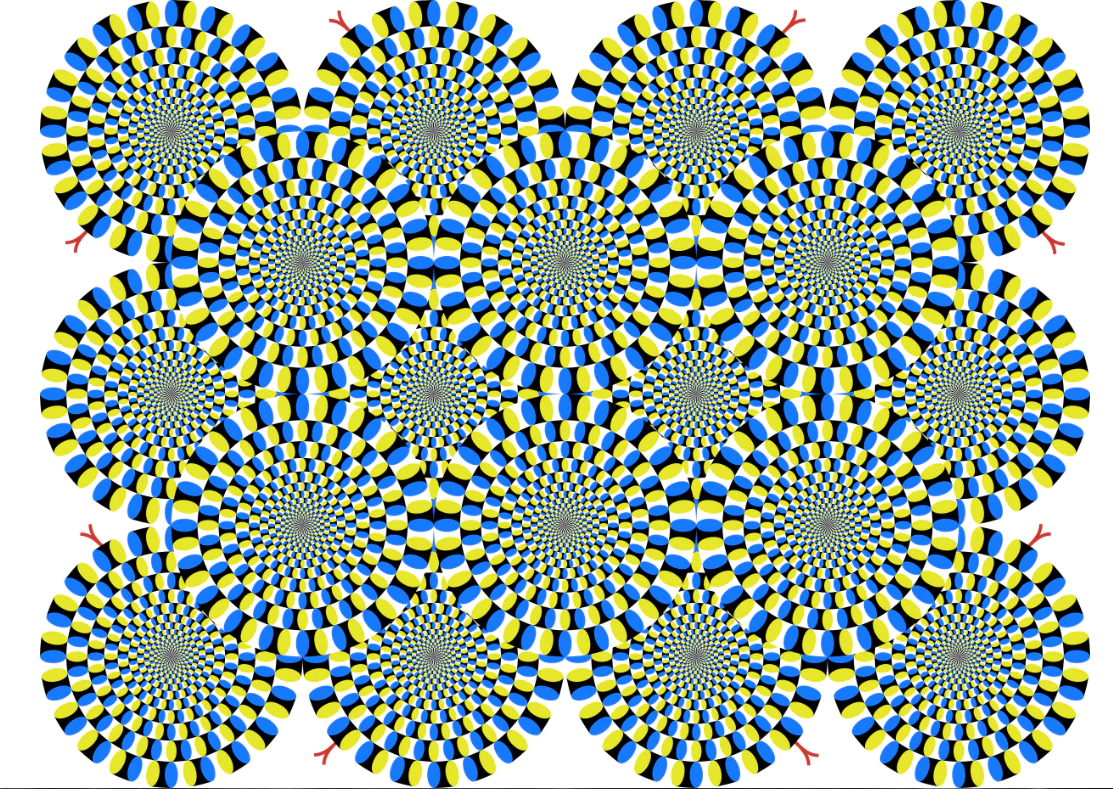

In [ ]:
## import libraries
from IPython.display import display
from PIL import Image

# Open an image file
image = Image.open("illusion1.jpg")
display(image)

This is an optical illusion image where due to [Moire effect](https://www.smithsonianmag.com/science-nature/these-patterns-move-but-its-all-an-illusion-1092906/) it feels like the pinwheels are moving.

### Let's access individual channels of the image.

In [ ]:
%pip install numpy opencv-python #install openCV, only run this once at the beginning

R channel


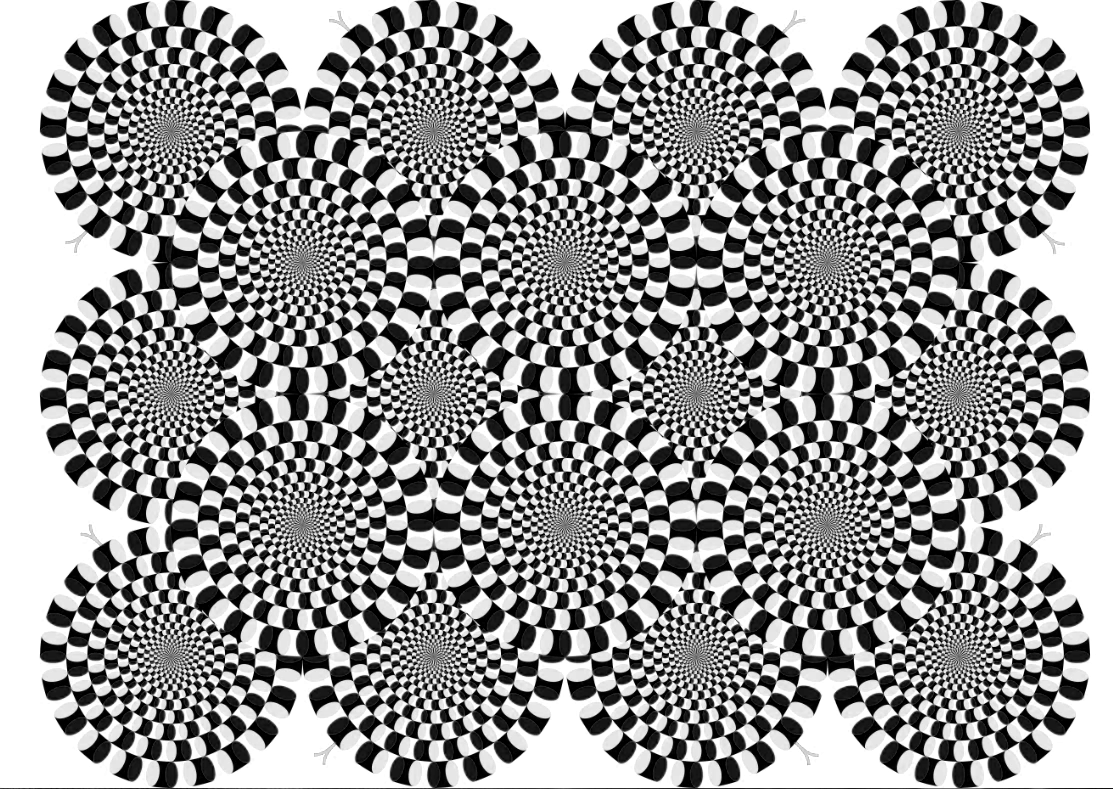

G channel


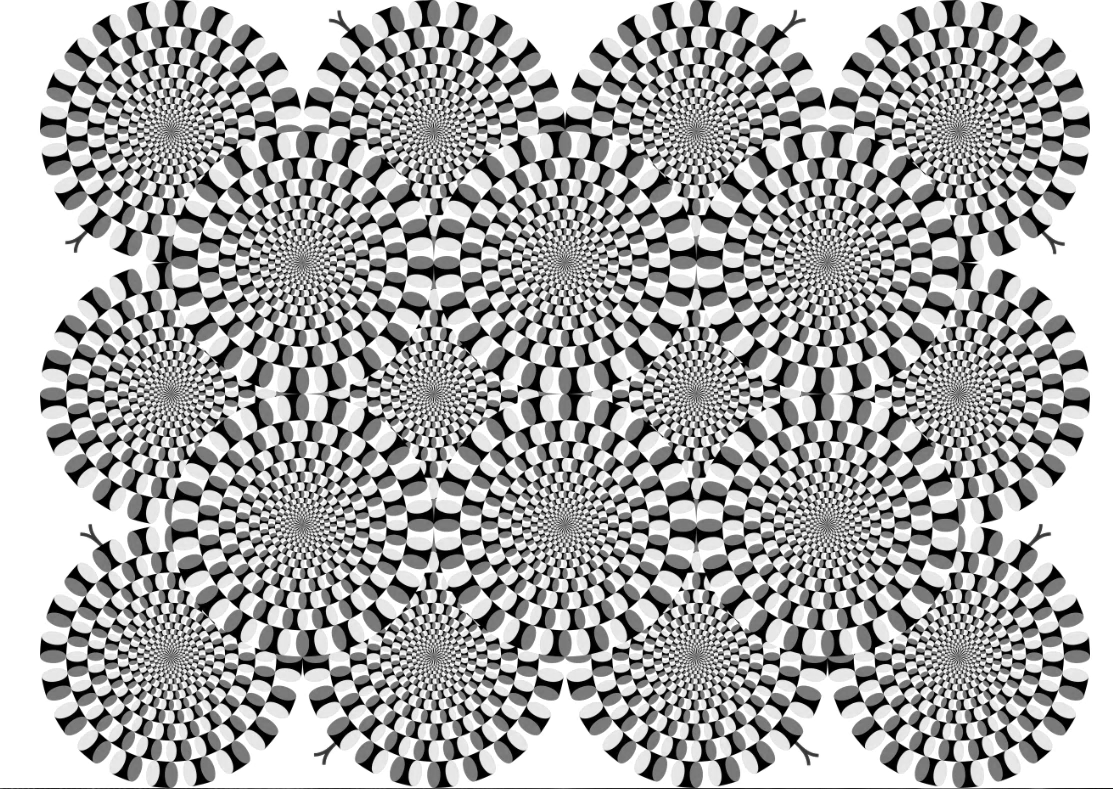

b channel


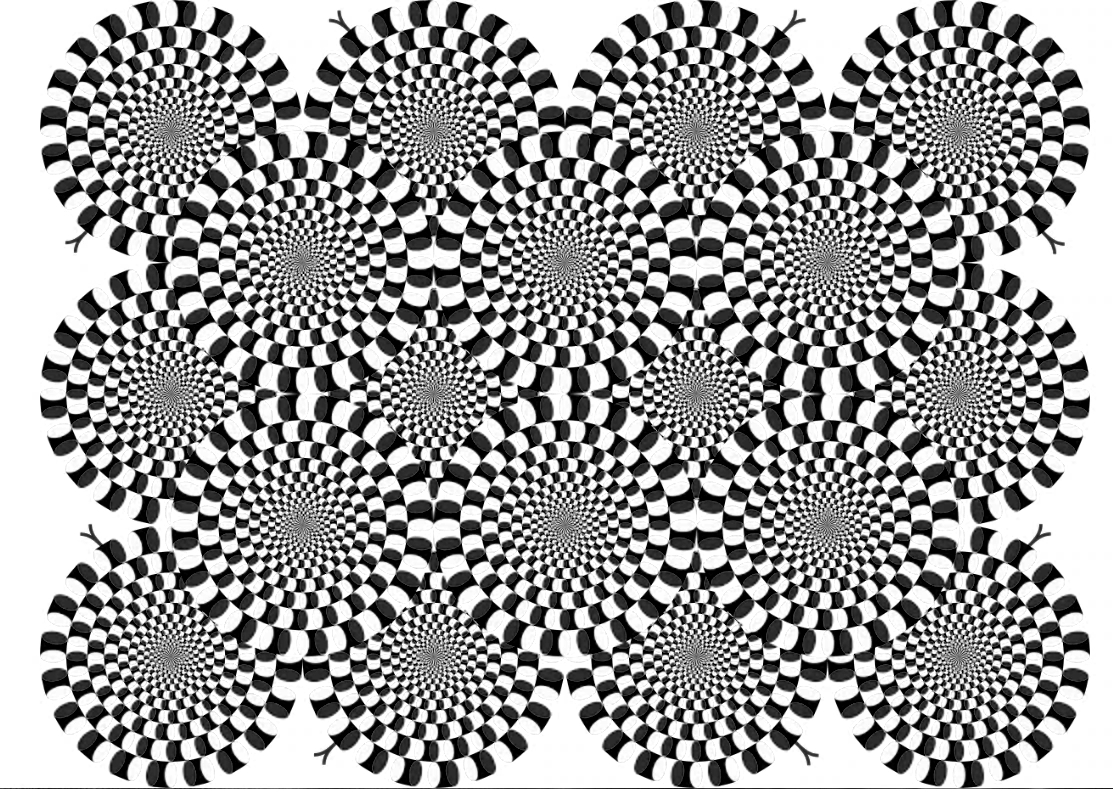

In [ ]:
#using split to separate the channels
r_channel, g_channel, b_channel = image.split()

#print and display
print('R channel')
display(r_channel)

print('G channel')
display(g_channel)

print('b channel')
display(b_channel)


## Merge the channels back again to get the original image

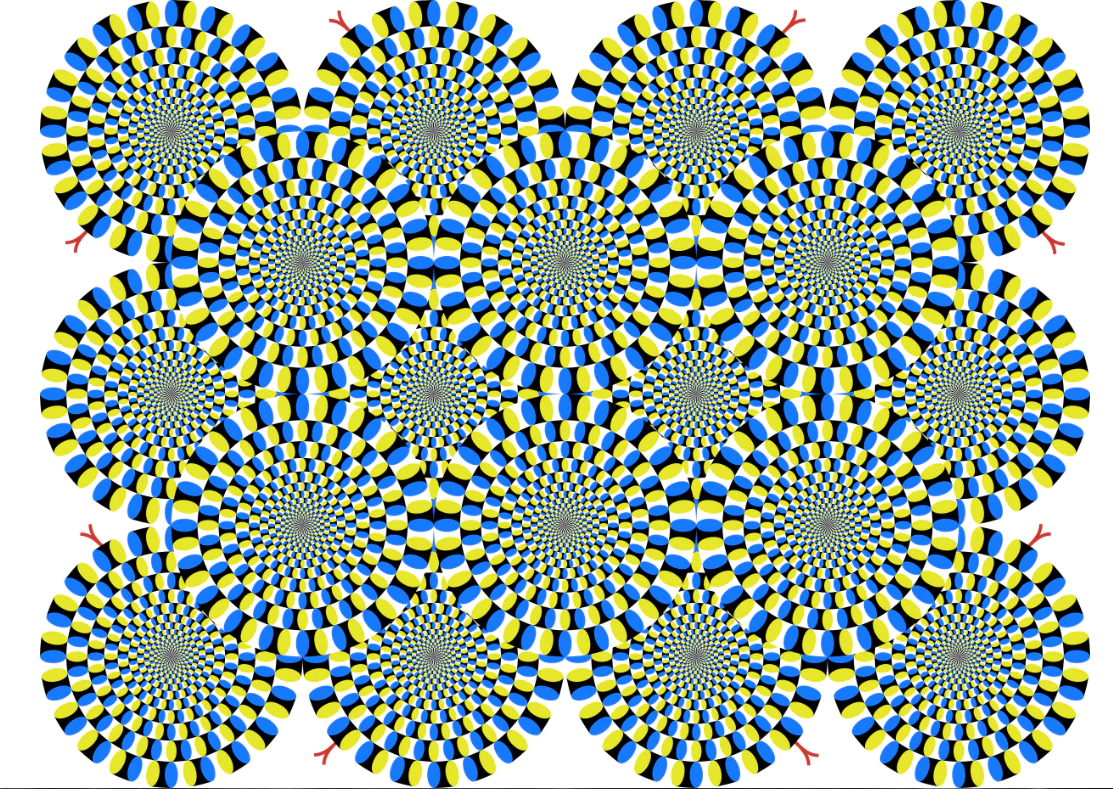

In [ ]:
original_image = Image.merge("RGB", (r_channel, g_channel, b_channel))
display(original_image)

### What differences do you observe from each of these single channel image? Write in the cell below briefly. ###












# Your answer here





## What happens to the image if we manipulate pixel values of a channel?

In [ ]:
# accessing red channel and setting it to zero, see: https://pillow.readthedocs.io/en/stable/reference/Image.html
# using r_channel.size to get the height and width of the r_channel matrix
zero_r_channel = Image.new("L", r_channel.size, 0)

original_image = Image.merge("RGB", (r_channel, zero_r_channel, b_channel))
display(original_image)

NameError: ignored

### Perform the same operation for g and b channel and display. ###





In [ ]:
## your code goes here









### What observations or differences you see? ###

#Your answer here








**You have created three augmented version of the original image that you can use as additional data**

## Task 1 (10pts)

1) Write a function `augment_image()` that will take `image_file_path` as the argument and apply different transformation methods available on pillow and will save the resulant images in a folder called `augmented_image`. (1pt)

2) When we pass a specific image file path to the function, the function will execute, apply the transformation, and save the augmented images in the folder `augmented_images`. (1pt)

You can apply the following transformation (you have seen most of them from project 1):

* rotate by 45 degrees. (1pt)
* resizing images to (200, 200) resolution (1pt)
* flip the image. (1pt)
* crop a (400, 400) patch from it (1pt)
* increase/decrese brightness by 50% (1pt)
* increase the constrast by 50% (1pt)
* blur the image using filter (1pt)
* sharpen te image by using filter (1pt)

Hint: you may use [this](https://pillow.readthedocs.io/en/stable/reference/Image.html), [this](https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html), and [this](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) module for this.

**Apply at LEAST 8 transformations so that we have 9 images (original and 8 augmented ones).**

Grade distribution: (1 X 8 +  1 + 1) = 10pts.



In [ ]:
## Your code goes here

from PIL import Image, ImageEnhance, ImageFilter

def augment_image(image_path):
    # Open the original image
    original_image = Image.open(image_path)

    # Create a list to store augmented images
    augmented_images = []

    # Augmentation 1: Rotate the image by 45 degrees

    augmented_images.append(rotated_image)

    # Augmentation 2: Resize the image to 200x200 pixels

    augmented_images.append(resized_image)

    # Augmentation 3: Crop a region defined by coordinates (left, upper, right, lower)

    augmented_images.append(cropped_image)

    # Augmentation 4: Flip the image horizontally (left to right)
    flipped_image = original_image.transpose(Image.FLIP_LEFT_RIGHT)
    augmented_images.append(flipped_image)

    # Augmentation 5: Enhance brightness

    augmented_images.append(enhanced_brightness)

    # Augmentation 6: Enhance contrast

    augmented_images.append(enhanced_contrast)

    # Augmentation 7: Apply Gaussian blur
    blurred_image = original_image.filter(ImageFilter.GaussianBlur(radius=4))
    augmented_images.append(blurred_image)

    # Augmentation 8: Apply sharpen filter
    sharpened_image = original_image.filter(ImageFilter.SHARPEN)
    augmented_images.append(sharpened_image)

    return augmented_images

# Example usage:
image_path = "illusion1.jpg"
augmented_images = augment_image(image_path)


# Save augmented images
for i, augmented_image in enumerate(augmented_images):
    augmented_image.save(f"augmented_images/augmentimage_{i}.jpg")

## Task 2 (16 pts)

In [ ]:
from PIL import Image

def create_image_puzzle(image_path, rows, columns, output_folder):
    # Open the original image
    original_image = Image.open(image_path)

    # Get the dimensions of the original image
    width, height = original_image.size

    # Calculate the dimensions of each puzzle piece


    # Create and save puzzle pieces
    for row in range(rows):
        for col in range(columns):
            # Calculate the coordinates of the current piece
            left =

            upper =

            right =

            lower =

            # Crop the current piece from the original image
            piece = original_image.crop((left, upper, right, lower))

            # Save the current piece to the output folder
            piece.save(output_folder + "/" + "piece_%d_%d.jpg" %(row, col))


input_image_path = "find_waldo.jpg"
rows = 3
columns = 3
output_folder = "puzzled_pieces"

create_image_puzzle(input_image_path, rows, columns, output_folder)

## Task 3

In [ ]:
import os

def put_image_puzzle_back_together(input_folder, output_path, rows, columns):

    # Get the list of puzzle piece file paths
    piece_files = sorted([f for f in os.listdir(input_folder) if f.startswith("piece_")])

    print('Number of pieces:', len(piece_files))
    if not piece_files:
        print("No puzzle pieces found in the folder.")
        return

    # Open the first puzzle piece to determine the dimensions
    first_piece =
    piece_width, piece_height =

    # Create a blank image to assemble the puzzle
    assembled_image = Image.new("RGB", (piece_width * columns, piece_height * rows))

    for row in range(rows):
        for col in range(columns):
            # Open the current puzzle piece
            piece = Image.open(input_folder + "/" + "piece_%d_%d.jpg" %(row, col))

            # Calculate the coordinates to paste each piece







            # Paste the current piece onto the assembled image
            assembled_image.paste(piece, (left, upper))

    # Save the assembled image
    assembled_image.save('assembled_image.jpg')

# Example usage:
input_folder = "puzzled_pieces"
output_path = "CS166_Project2"


put_image_puzzle_back_together(input_folder, output_path, rows, columns)

Number of pieces: 9
